# 2. Pre-Processamento

## Objetivo:
* Discretizar o atributo HORA para verificar se há alguma relação entre a hora e o número de acidentes

## Considerações:
* 06h..<= **manhã**......< 12h
* 12h..<= **tarde**......< 18h
* 18h..<= **noite**......< 00h
* 00h..<= **madrugada**..< 6h

In [2]:
import pandas as pd
import math
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv("../../Database/acidentes_2016.csv", sep=";")

In [14]:
horas = df['HORA']
df['HORA_DISCRETIZADA'] = [math.nan for i in range(len(df))]

### Removendo linhas nas quais o horário é nulo

In [7]:
horas.dropna(inplace=True)

In [8]:
int(horas[0].replace(":",""))

ValueError: invalid literal for int() with base 10: 'TARDE'

In [9]:
manha = 0
tarde = 0
noite = 0
madrugada = 0
cont = 0
for hora in horas:
    hora_int = int(hora.replace(":",""))
    
    if (hora_int >= 600) & (hora_int < 1200):
        manha = manha + 1
        
    elif (hora_int >= 1200) & (hora_int < 1800):
        tarde = tarde + 1
        
    elif (hora_int >= 1800) & (hora_int < 2400):
        noite = noite + 1
    
    elif (hora_int >= 0) & (hora_int < 600):
        madrugada = madrugada + 1

ValueError: invalid literal for int() with base 10: 'TARDE'

In [10]:
horas[(horas>='06:00') & (horas<='12:00')] = 'MANHA'
horas[(horas>='12:00') & (horas<='18:00')] = 'TARDE'
horas[(horas>='18:00') & (horas<='24:00')] = 'NOITE'
horas[(horas>='00:00') & (horas<='06:00')] = 'MADRUGADA'

In [12]:
df['HORA_DISCRETIZADA'] = horas

In [8]:
df.to_csv("../Database/acidentes_2016.csv", sep=";", index=False)

### Discretização

In [9]:
horaDiscretizada = pd.Series()
horaDiscretizada['Manhã'] = manha
horaDiscretizada['Tarde'] = tarde
horaDiscretizada['Noite'] = noite
horaDiscretizada['Madrugada'] = madrugada

NameError: name 'manha' is not defined

### Plotando o gráfico

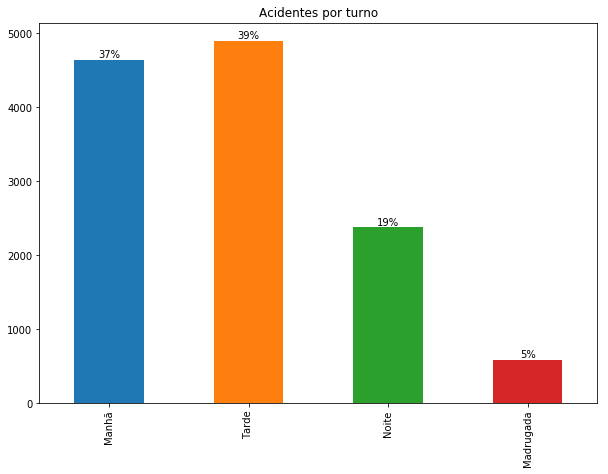

In [16]:
percent = ["{}%".format(round(100*qtd_acidentes/len(horas))) for qtd_acidentes in horaDiscretizada]
ax = horaDiscretizada.plot(kind='bar', title="Acidentes por turno", figsize=(10,7))

for i,child in enumerate(ax.get_children()[:horaDiscretizada.size]):
    ax.text(x = i, y = child.get_bbox().y1+30, s = percent[i], horizontalalignment ='center')
